In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ml-olympiad-sustainable-urban-living/sample_submission.csv
/kaggle/input/ml-olympiad-sustainable-urban-living/train.csv
/kaggle/input/ml-olympiad-sustainable-urban-living/test.csv


In [2]:
# Paths to the CSV files
train_path = '/kaggle/input/ml-olympiad-sustainable-urban-living/train.csv'
test_path = '/kaggle/input/ml-olympiad-sustainable-urban-living/test.csv'
submission_path = '/kaggle/input/ml-olympiad-sustainable-urban-living/sample_submission.csv'

# Read the CSV files into pandas DataFrames
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
submission_df = pd.read_csv(submission_path)

In [3]:
train_df

,Id,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31594,0x4dbe,Apartment,851,4.0,1,Semi_Furnished,0.0,No,All time,7.80,Well below average,Medium,149.0,4.72,73.12
31595,0x41b3,Container Home,315,1.0,1,Fully Furnished,0.0,Yes,Once in a day - Morning,5.92,Well below average,Medium,82.0,4.50,95.40
31596,0x8531,Duplex,480,6.0,3,Semi_Furnished,0.0,No,Once in two days,5.68,Well below average,Medium,80.0,3.88,81.29
31597,0x2537,Apartment,642,1.0,2,Semi_Furnished,1.0,No,Once in a day - Morning,7.09,Well below average,Medium,162.0,3.76,82.80


In [4]:
# Drop the 'id' column from the DataFrame
train_df.drop(columns=['Id'], inplace=True)

train_df.head()

,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70


In [5]:
# checking the number of unique property types 
Property_count = train_df['Property_Type'].nunique()

print("Number of unique features in the Property type:", Property_count)

unique_property_types = train_df['Property_Type'].unique()

print("Unique property types:")
for property_type in unique_property_types:
    print(property_type)

Number of unique features in the Property type: 6
Unique property types:
Apartment
Bungalow
Single-family home
Duplex
#R%$G&867
Container Home


In [6]:
# Perform one-hot encoding on the 'Property_Type' column with numeric values
train_df = pd.get_dummies(train_df, columns=['Property_Type'], dtype=int)

In [7]:
train_df

,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score,Property_Type_#R%$G&867,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home
0,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98,0,1,0,0,0,0
1,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20,0,1,0,0,0,0
2,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39,0,1,0,0,0,0
3,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46,0,1,0,0,0,0
4,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31594,851,4.0,1,Semi_Furnished,0.0,No,All time,7.80,Well below average,Medium,149.0,4.72,73.12,0,1,0,0,0,0
31595,315,1.0,1,Fully Furnished,0.0,Yes,Once in a day - Morning,5.92,Well below average,Medium,82.0,4.50,95.40,0,0,0,1,0,0
31596,480,6.0,3,Semi_Furnished,0.0,No,Once in two days,5.68,Well below average,Medium,80.0,3.88,81.29,0,0,0,0,1,0
31597,642,1.0,2,Semi_Furnished,1.0,No,Once in a day - Morning,7.09,Well below average,Medium,162.0,3.76,82.80,0,1,0,0,0,0


In [8]:
# Get the unique values of the 'Furnishing' column
unique_furnishing_values = train_df['Furnishing'].unique()

# Print the unique values
print("Unique values of the 'Furnishing' column:")
for value in unique_furnishing_values:
    print(value)

Unique values of the 'Furnishing' column:
Semi_Furnished
Unfurnished
Fully Furnished
nan


In [9]:
from sklearn.preprocessing import OrdinalEncoder

# Drop NaN values from the 'Furnishing' column
train_df.dropna(subset=['Furnishing'], inplace=True)

# Define the mapping for ordinal encoding
ordinal_mapping = {
    'Semi_Furnished': 1,
    'Unfurnished': 0,
    'Fully Furnished': 2
}

# Apply ordinal encoding
train_df['Furnishing'] = train_df['Furnishing'].map(ordinal_mapping)

# Print the unique values to confirm encoding
print("Unique values of the 'Furnishing' column after ordinal encoding:")
print(train_df['Furnishing'].unique())

Unique values of the 'Furnishing' column after ordinal encoding:
[1 0 2]


In [10]:
from sklearn.preprocessing import OrdinalEncoder

# Drop NaN values from the 'Crime_Rate' column
train_df.dropna(subset=['Crime_Rate'], inplace=True)

# Define the mapping for ordinal encoding
ordinal_mapping = {
    'Well below average': 3,
    'Slightly below average': 2,
    'Slightly above average': 1,
    'Well above average': 0
}

# Apply ordinal encoding
train_df['Crime_Rate'] = train_df['Crime_Rate'].map(ordinal_mapping)

# Print the unique values to confirm encoding
print("Unique values of the 'Crime_Rate' column after ordinal encoding:")
print(train_df['Crime_Rate'].unique())

Unique values of the 'Crime_Rate' column after ordinal encoding:
[2 3 0 1]


In [11]:
# Drop NaN values from the 'Dust_and_Noise' column
train_df.dropna(subset=['Dust_and_Noise'], inplace=True)

# Define the mapping for ordinal encoding
ordinal_mapping = {
    'Low': 2,
    'Medium': 1,
    'High': 0
}

# Apply ordinal encoding
train_df['Dust_and_Noise'] = train_df['Dust_and_Noise'].map(ordinal_mapping)

# Print the unique values to confirm encoding
print("Unique values of the 'Dust_and_Noise' column after ordinal encoding:")
print(train_df['Dust_and_Noise'].unique())

Unique values of the 'Dust_and_Noise' column after ordinal encoding:
[1 0 2]


In [12]:
train_df

,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score,Property_Type_#R%$G&867,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home
0,106,NaN,1,1,0.0,No,Once in a day - Morning,5.89,2,1,90.0,3.86,71.98,0,1,0,0,0,0
1,733,2.0,2,0,1.0,No,Once in a day - Evening,4.37,3,1,96.0,3.55,71.20,0,1,0,0,0,0
2,737,4.0,2,2,0.0,No,Once in a day - Morning,7.45,2,1,121.0,3.81,71.39,0,1,0,0,0,0
3,900,3.0,2,0,2.0,Yes,Once in a day - Morning,6.16,0,1,100.0,1.34,31.46,0,1,0,0,0,0
4,2238,14.0,6,2,0.0,No,All time,5.46,3,1,116.0,4.77,93.70,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31594,851,4.0,1,1,0.0,No,All time,7.80,3,1,149.0,4.72,73.12,0,1,0,0,0,0
31595,315,1.0,1,2,0.0,Yes,Once in a day - Morning,5.92,3,1,82.0,4.50,95.40,0,0,0,1,0,0
31596,480,6.0,3,1,0.0,No,Once in two days,5.68,3,1,80.0,3.88,81.29,0,0,0,0,1,0
31597,642,1.0,2,1,1.0,No,Once in a day - Morning,7.09,3,1,162.0,3.76,82.80,0,1,0,0,0,0


In [13]:
# Impute missing values with the mean and round off
train_df['Number_of_Windows'].fillna(train_df['Number_of_Windows'].mean(), inplace=True)
train_df['Number_of_Windows'] = train_df['Number_of_Windows'].round()
train_df['Number_of_Windows']

/tmp/ipykernel_33/367931974.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Number_of_Windows'].fillna(train_df['Number_of_Windows'].mean(), inplace=True)


0         4.0
1         2.0
2         4.0
3         3.0
4        14.0
         ... 
31594     4.0
31595     1.0
31596     6.0
31597     1.0
31598     4.0
Name: Number_of_Windows, Length: 29197, dtype: float64

In [14]:
# Impute missing values with the mean
train_df['Frequency_of_Powercuts'].fillna(train_df['Frequency_of_Powercuts'].mean(), inplace=True)
train_df['Frequency_of_Powercuts'] = train_df['Frequency_of_Powercuts'].round()
train_df.head()

/tmp/ipykernel_33/3367882551.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Frequency_of_Powercuts'].fillna(train_df['Frequency_of_Powercuts'].mean(), inplace=True)


,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score,Property_Type_#R%$G&867,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home
0,106,4.0,1,1,0.0,No,Once in a day - Morning,5.89,2,1,90.0,3.86,71.98,0,1,0,0,0,0
1,733,2.0,2,0,1.0,No,Once in a day - Evening,4.37,3,1,96.0,3.55,71.20,0,1,0,0,0,0
2,737,4.0,2,2,0.0,No,Once in a day - Morning,7.45,2,1,121.0,3.81,71.39,0,1,0,0,0,0
3,900,3.0,2,0,2.0,Yes,Once in a day - Morning,6.16,0,1,100.0,1.34,31.46,0,1,0,0,0,0
4,2238,14.0,6,2,0.0,No,All time,5.46,3,1,116.0,4.77,93.70,0,0,1,0,0,0


In [15]:
unique_count = train_df['Power_Backup'].unique()

print("Number of unique values in 'Power_Backup':", unique_count)

Number of unique values in 'Power_Backup': ['No' 'Yes' 'NOT MENTIONED']


In [16]:
# Drop rows with 'NOT MENTIONED' in 'Power_Backup' column
train_df = train_df[train_df['Power_Backup'] != 'NOT MENTIONED']

# Replace 'No' with 0 and 'Yes' with 1
train_df['Power_Backup'] = train_df['Power_Backup'].replace({'No': 0, 'Yes': 1})

# Count the number of unique values after transformation
unique_values_after_transformation = train_df['Power_Backup'].nunique()

print("Number of unique values in 'Power_Backup' after transformation:", unique_values_after_transformation)

Number of unique values in 'Power_Backup' after transformation: 2


/tmp/ipykernel_33/3559687507.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Power_Backup'] = train_df['Power_Backup'].replace({'No': 0, 'Yes': 1})
/tmp/ipykernel_33/3559687507.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Power_Backup'] = train_df['Power_Backup'].replace({'No': 0, 'Yes': 1})


In [17]:
train_df = train_df[train_df['Water_Supply'] != 'NOT MENTIONED']

# Encode the remaining values
train_df['Water_Supply'] = train_df['Water_Supply'].map({
    'Once in a day - Morning': 1,
    'Once in a day - Evening': 1,
    'All time': 2,
    'Once in two days': 0
})

# Count the number of unique values after transformation
unique_values_after_transformation = train_df['Water_Supply'].nunique()

print("Number of unique values in 'Water_Supply' after transformation:", unique_values_after_transformation)

Number of unique values in 'Water_Supply' after transformation: 3


In [18]:
train_df

,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score,Property_Type_#R%$G&867,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home
0,106,4.0,1,1,0.0,0,1,5.89,2,1,90.0,3.86,71.98,0,1,0,0,0,0
1,733,2.0,2,0,1.0,0,1,4.37,3,1,96.0,3.55,71.20,0,1,0,0,0,0
2,737,4.0,2,2,0.0,0,1,7.45,2,1,121.0,3.81,71.39,0,1,0,0,0,0
3,900,3.0,2,0,2.0,1,1,6.16,0,1,100.0,1.34,31.46,0,1,0,0,0,0
4,2238,14.0,6,2,0.0,0,2,5.46,3,1,116.0,4.77,93.70,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31594,851,4.0,1,1,0.0,0,2,7.80,3,1,149.0,4.72,73.12,0,1,0,0,0,0
31595,315,1.0,1,2,0.0,1,1,5.92,3,1,82.0,4.50,95.40,0,0,0,1,0,0
31596,480,6.0,3,1,0.0,0,0,5.68,3,1,80.0,3.88,81.29,0,0,0,0,1,0
31597,642,1.0,2,1,1.0,0,1,7.09,3,1,162.0,3.76,82.80,0,1,0,0,0,0


In [19]:
submission_df

,Id,Habitability_score
0,0x6808,93.67
1,0x6a98,60.78
2,0xacc0,52.04
3,0x8225,82.43
4,0xaee8,28.23
...,...,...
7895,0x6e26,28.84
7896,0xa013,88.77
7897,0x9721,60.40
7898,0x7e25,32.57


In [20]:
test_df

,Id,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review
0,0x6808,Single-family home,1521,5.0,1,Unfurnished,0.0,No,All time,7.61,Well below average,Medium,156.0,4.71
1,0x6a98,Single-family home,2233,2.0,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.28,Well below average,Medium,82.0,4.50
2,0xacc0,Apartment,986,1.0,1,Unfurnished,0.0,No,All time,7.72,Well below average,Medium,91.0,4.79
3,0x8225,Single-family home,1625,2.0,1,Semi_Furnished,0.0,No,Once in a day - Evening,6.19,Well below average,Medium,159.0,4.09
4,0xaee8,Single-family home,1166,2.0,2,Fully Furnished,0.0,No,Once in a day - Evening,5.84,Slightly below average,Medium,82.0,3.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7895,0x6e26,Single-family home,1120,3.0,2,NaN,0.0,No,All time,5.55,Slightly above average,Medium,80.0,3.56
7896,0xa013,Apartment,445,1.0,3,Fully Furnished,1.0,No,All time,5.70,Slightly above average,Medium,86.0,2.93
7897,0x9721,Bungalow,3780,6.0,6,Unfurnished,0.0,Yes,Once in two days,6.84,Well below average,Medium,137.0,3.80
7898,0x7e25,Single-family home,1266,3.0,1,Semi_Furnished,0.0,No,Once in a day - Morning,4.60,Slightly above average,NaN,88.0,3.25


In [21]:
test_df = pd.get_dummies(test_df, columns=['Property_Type'], dtype=int)
test_df

,Id,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Property_Type_#R%$G&867,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home
0,0x6808,1521,5.0,1,Unfurnished,0.0,No,All time,7.61,Well below average,Medium,156.0,4.71,0,0,0,0,0,1
1,0x6a98,2233,2.0,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.28,Well below average,Medium,82.0,4.50,0,0,0,0,0,1
2,0xacc0,986,1.0,1,Unfurnished,0.0,No,All time,7.72,Well below average,Medium,91.0,4.79,0,1,0,0,0,0
3,0x8225,1625,2.0,1,Semi_Furnished,0.0,No,Once in a day - Evening,6.19,Well below average,Medium,159.0,4.09,0,0,0,0,0,1
4,0xaee8,1166,2.0,2,Fully Furnished,0.0,No,Once in a day - Evening,5.84,Slightly below average,Medium,82.0,3.56,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7895,0x6e26,1120,3.0,2,NaN,0.0,No,All time,5.55,Slightly above average,Medium,80.0,3.56,0,0,0,0,0,1
7896,0xa013,445,1.0,3,Fully Furnished,1.0,No,All time,5.70,Slightly above average,Medium,86.0,2.93,0,1,0,0,0,0
7897,0x9721,3780,6.0,6,Unfurnished,0.0,Yes,Once in two days,6.84,Well below average,Medium,137.0,3.80,0,0,1,0,0,0
7898,0x7e25,1266,3.0,1,Semi_Furnished,0.0,No,Once in a day - Morning,4.60,Slightly above average,NaN,88.0,3.25,0,0,0,0,0,1


In [22]:
# Get the unique values of the 'Furnishing' column
unique_furnishing_values = test_df['Furnishing'].unique()

# Print the unique values
print("Unique values of the 'Furnishing' column:")
for value in unique_furnishing_values:
    print(value)

Unique values of the 'Furnishing' column:
Unfurnished
Semi_Furnished
Fully Furnished
nan


In [23]:
# Replace NaN values with 'None'
test_df['Furnishing'].fillna('None', inplace=True)

# Define the mapping for ordinal encoding
ordinal_mapping = {
    'Semi_Furnished': 1,
    'Unfurnished': 0,
    'Fully Furnished': 2,
    'None': None  # Adding None to the mapping
}

# Apply ordinal encoding
test_df['Furnishing'] = test_df['Furnishing'].map(ordinal_mapping)

# Print the unique values to confirm encoding
print("Unique values of the 'Furnishing' column after ordinal encoding:")
print(test_df['Furnishing'].unique())

Unique values of the 'Furnishing' column after ordinal encoding:
[ 0.  1.  2. nan]


/tmp/ipykernel_33/1811370743.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Furnishing'].fillna('None', inplace=True)


In [24]:
test_df['Crime_Rate'].fillna('None', inplace=True)

# Define the mapping for ordinal encoding
ordinal_mapping = {
    'Well below average': 3,
    'Slightly below average': 2,
    'Slightly above average': 1,
    'Well above average': 0,
    'None': None  # Adding None to the mapping
}

# Apply ordinal encoding
test_df['Crime_Rate'] = test_df['Crime_Rate'].map(ordinal_mapping)

# Print the unique values to confirm encoding
print("Unique values of the 'Crime_Rate' column after ordinal encoding:")
test_df

Unique values of the 'Crime_Rate' column after ordinal encoding:


/tmp/ipykernel_33/2328385748.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Crime_Rate'].fillna('None', inplace=True)


,Id,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Property_Type_#R%$G&867,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home
0,0x6808,1521,5.0,1,0.0,0.0,No,All time,7.61,3.0,Medium,156.0,4.71,0,0,0,0,0,1
1,0x6a98,2233,2.0,1,1.0,0.0,No,Once in a day - Morning,5.28,3.0,Medium,82.0,4.50,0,0,0,0,0,1
2,0xacc0,986,1.0,1,0.0,0.0,No,All time,7.72,3.0,Medium,91.0,4.79,0,1,0,0,0,0
3,0x8225,1625,2.0,1,1.0,0.0,No,Once in a day - Evening,6.19,3.0,Medium,159.0,4.09,0,0,0,0,0,1
4,0xaee8,1166,2.0,2,2.0,0.0,No,Once in a day - Evening,5.84,2.0,Medium,82.0,3.56,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7895,0x6e26,1120,3.0,2,NaN,0.0,No,All time,5.55,1.0,Medium,80.0,3.56,0,0,0,0,0,1
7896,0xa013,445,1.0,3,2.0,1.0,No,All time,5.70,1.0,Medium,86.0,2.93,0,1,0,0,0,0
7897,0x9721,3780,6.0,6,0.0,0.0,Yes,Once in two days,6.84,3.0,Medium,137.0,3.80,0,0,1,0,0,0
7898,0x7e25,1266,3.0,1,1.0,0.0,No,Once in a day - Morning,4.60,1.0,NaN,88.0,3.25,0,0,0,0,0,1


In [25]:
test_df

,Id,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Property_Type_#R%$G&867,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home
0,0x6808,1521,5.0,1,0.0,0.0,No,All time,7.61,3.0,Medium,156.0,4.71,0,0,0,0,0,1
1,0x6a98,2233,2.0,1,1.0,0.0,No,Once in a day - Morning,5.28,3.0,Medium,82.0,4.50,0,0,0,0,0,1
2,0xacc0,986,1.0,1,0.0,0.0,No,All time,7.72,3.0,Medium,91.0,4.79,0,1,0,0,0,0
3,0x8225,1625,2.0,1,1.0,0.0,No,Once in a day - Evening,6.19,3.0,Medium,159.0,4.09,0,0,0,0,0,1
4,0xaee8,1166,2.0,2,2.0,0.0,No,Once in a day - Evening,5.84,2.0,Medium,82.0,3.56,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7895,0x6e26,1120,3.0,2,NaN,0.0,No,All time,5.55,1.0,Medium,80.0,3.56,0,0,0,0,0,1
7896,0xa013,445,1.0,3,2.0,1.0,No,All time,5.70,1.0,Medium,86.0,2.93,0,1,0,0,0,0
7897,0x9721,3780,6.0,6,0.0,0.0,Yes,Once in two days,6.84,3.0,Medium,137.0,3.80,0,0,1,0,0,0
7898,0x7e25,1266,3.0,1,1.0,0.0,No,Once in a day - Morning,4.60,1.0,NaN,88.0,3.25,0,0,0,0,0,1


In [26]:
# Replace 'NOT MENTIONED' with 'None'
test_df['Water_Supply'] = test_df['Water_Supply'].replace('NOT MENTIONED', 'None')

# Encode the remaining values
test_df['Water_Supply'] = test_df['Water_Supply'].map({
    'Once in a day - Morning': 1,
    'Once in a day - Evening': 1,
    'All time': 2,
    'Once in two days': 0,
    'None': None  # Adding 'None' to the mapping
})

# Count the number of unique values after transformation
unique_values_after_transformation = test_df['Water_Supply'].nunique()

print("Number of unique values in 'Water_Supply' after transformation:", unique_values_after_transformation)

Number of unique values in 'Water_Supply' after transformation: 3


In [27]:
test_df['Frequency_of_Powercuts'].fillna(test_df['Frequency_of_Powercuts'].mean(), inplace=True)
test_df['Frequency_of_Powercuts'] = test_df['Frequency_of_Powercuts'].round()
test_df.head()

/tmp/ipykernel_33/4107875810.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Frequency_of_Powercuts'].fillna(test_df['Frequency_of_Powercuts'].mean(), inplace=True)


,Id,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Property_Type_#R%$G&867,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home
0,0x6808,1521,5.0,1,0.0,0.0,No,2.0,7.61,3.0,Medium,156.0,4.71,0,0,0,0,0,1
1,0x6a98,2233,2.0,1,1.0,0.0,No,1.0,5.28,3.0,Medium,82.0,4.50,0,0,0,0,0,1
2,0xacc0,986,1.0,1,0.0,0.0,No,2.0,7.72,3.0,Medium,91.0,4.79,0,1,0,0,0,0
3,0x8225,1625,2.0,1,1.0,0.0,No,1.0,6.19,3.0,Medium,159.0,4.09,0,0,0,0,0,1
4,0xaee8,1166,2.0,2,2.0,0.0,No,1.0,5.84,2.0,Medium,82.0,3.56,0,0,0,0,0,1


In [28]:
# Replace 'NOT MENTIONED' with 'None'
test_df['Power_Backup'] = test_df['Power_Backup'].replace('NOT MENTIONED', None)

# Replace 'No' with 0 and 'Yes' with 1
test_df['Power_Backup'] = test_df['Power_Backup'].replace({'No': 0, 'Yes': 1})
test_df

/tmp/ipykernel_33/3196334378.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['Power_Backup'] = test_df['Power_Backup'].replace({'No': 0, 'Yes': 1})


,Id,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Property_Type_#R%$G&867,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home
0,0x6808,1521,5.0,1,0.0,0.0,0.0,2.0,7.61,3.0,Medium,156.0,4.71,0,0,0,0,0,1
1,0x6a98,2233,2.0,1,1.0,0.0,0.0,1.0,5.28,3.0,Medium,82.0,4.50,0,0,0,0,0,1
2,0xacc0,986,1.0,1,0.0,0.0,0.0,2.0,7.72,3.0,Medium,91.0,4.79,0,1,0,0,0,0
3,0x8225,1625,2.0,1,1.0,0.0,0.0,1.0,6.19,3.0,Medium,159.0,4.09,0,0,0,0,0,1
4,0xaee8,1166,2.0,2,2.0,0.0,0.0,1.0,5.84,2.0,Medium,82.0,3.56,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7895,0x6e26,1120,3.0,2,NaN,0.0,0.0,2.0,5.55,1.0,Medium,80.0,3.56,0,0,0,0,0,1
7896,0xa013,445,1.0,3,2.0,1.0,0.0,2.0,5.70,1.0,Medium,86.0,2.93,0,1,0,0,0,0
7897,0x9721,3780,6.0,6,0.0,0.0,1.0,0.0,6.84,3.0,Medium,137.0,3.80,0,0,1,0,0,0
7898,0x7e25,1266,3.0,1,1.0,0.0,0.0,1.0,4.60,1.0,NaN,88.0,3.25,0,0,0,0,0,1


In [29]:
ordinal_mapping = {
    'Low': 2,
    'Medium': 1,
    'High': 0
}

# Apply ordinal encoding
test_df['Dust_and_Noise'] = test_df['Dust_and_Noise'].map(ordinal_mapping)

# Print the unique values to confirm encoding
print("Unique values of the 'Dust_and_Noise' column after ordinal encoding:")
test_df

Unique values of the 'Dust_and_Noise' column after ordinal encoding:


,Id,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Property_Type_#R%$G&867,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home
0,0x6808,1521,5.0,1,0.0,0.0,0.0,2.0,7.61,3.0,1.0,156.0,4.71,0,0,0,0,0,1
1,0x6a98,2233,2.0,1,1.0,0.0,0.0,1.0,5.28,3.0,1.0,82.0,4.50,0,0,0,0,0,1
2,0xacc0,986,1.0,1,0.0,0.0,0.0,2.0,7.72,3.0,1.0,91.0,4.79,0,1,0,0,0,0
3,0x8225,1625,2.0,1,1.0,0.0,0.0,1.0,6.19,3.0,1.0,159.0,4.09,0,0,0,0,0,1
4,0xaee8,1166,2.0,2,2.0,0.0,0.0,1.0,5.84,2.0,1.0,82.0,3.56,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7895,0x6e26,1120,3.0,2,NaN,0.0,0.0,2.0,5.55,1.0,1.0,80.0,3.56,0,0,0,0,0,1
7896,0xa013,445,1.0,3,2.0,1.0,0.0,2.0,5.70,1.0,1.0,86.0,2.93,0,1,0,0,0,0
7897,0x9721,3780,6.0,6,0.0,0.0,1.0,0.0,6.84,3.0,1.0,137.0,3.80,0,0,1,0,0,0
7898,0x7e25,1266,3.0,1,1.0,0.0,0.0,1.0,4.60,1.0,NaN,88.0,3.25,0,0,0,0,0,1


In [30]:
nan_counts = test_df.isna().sum()
print(nan_counts)

Id                                    0
Property_Area                         0
Number_of_Windows                   321
Number_of_Doors                       0
Furnishing                          214
Frequency_of_Powercuts                0
Power_Backup                        149
Water_Supply                         87
Traffic_Density_Score                 0
Crime_Rate                          158
Dust_and_Noise                      220
Air_Quality_Index                     0
Neighborhood_Review                   0
Property_Type_#R%$G&867               0
Property_Type_Apartment               0
Property_Type_Bungalow                0
Property_Type_Container Home          0
Property_Type_Duplex                  0
Property_Type_Single-family home      0
dtype: int64


In [31]:
test_df['Number_of_Windows'].fillna(test_df['Number_of_Windows'].mean(), inplace=True)
test_df['Number_of_Windows'] = test_df['Number_of_Windows'].round()
test_df['Number_of_Windows']

/tmp/ipykernel_33/1333737159.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Number_of_Windows'].fillna(test_df['Number_of_Windows'].mean(), inplace=True)


0       5.0
1       2.0
2       1.0
3       2.0
4       2.0
       ... 
7895    3.0
7896    1.0
7897    6.0
7898    3.0
7899    2.0
Name: Number_of_Windows, Length: 7900, dtype: float64

In [32]:
# Assuming 'Furnishing' column has missing values represented as NaN
# Replace missing values with a value within the range of 0, 1, and 2
test_df['Furnishing'].fillna(test_df['Furnishing'].mode()[0], inplace=True)

# Round the values to the nearest integer
test_df['Furnishing'] = test_df['Furnishing'].round()

# Ensure the values are within the range of 0, 1, and 2
test_df['Furnishing'] = test_df['Furnishing'].clip(0, 2)

# Display the 'Furnishing' column
test_df['Furnishing']

/tmp/ipykernel_33/2119707629.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Furnishing'].fillna(test_df['Furnishing'].mode()[0], inplace=True)


0       0.0
1       1.0
2       0.0
3       1.0
4       2.0
       ... 
7895    1.0
7896    2.0
7897    0.0
7898    1.0
7899    2.0
Name: Furnishing, Length: 7900, dtype: float64

In [33]:
# Assuming 'Power_Backup' column has missing values represented as NaN
# Replace missing values with a value within the range of 0 and 1
test_df['Power_Backup'].fillna(test_df['Power_Backup'].mode()[0], inplace=True)

# Round the values to the nearest integer
test_df['Power_Backup'] = test_df['Power_Backup'].round()

# Ensure the values are within the range of 0 and 1
test_df['Power_Backup'] = test_df['Power_Backup'].clip(0, 1)

# Display the 'Power_Backup' column
test_df['Power_Backup']

/tmp/ipykernel_33/1991292424.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Power_Backup'].fillna(test_df['Power_Backup'].mode()[0], inplace=True)


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7895    0.0
7896    0.0
7897    1.0
7898    0.0
7899    0.0
Name: Power_Backup, Length: 7900, dtype: float64

In [34]:
# Assuming 'Water_Supply' column has missing values represented as NaN
# Replace missing values with a value within the range of 0, 1, and 2
test_df['Water_Supply'].fillna(test_df['Water_Supply'].mode()[0], inplace=True)

# Round the values to the nearest integer
test_df['Water_Supply'] = test_df['Water_Supply'].round()

# Ensure the values are within the range of 0, 1, and 2
test_df['Water_Supply'] = test_df['Water_Supply'].clip(0, 2)

# Display the 'Water_Supply' column
test_df['Water_Supply']

/tmp/ipykernel_33/1502515258.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Water_Supply'].fillna(test_df['Water_Supply'].mode()[0], inplace=True)


0       2.0
1       1.0
2       2.0
3       1.0
4       1.0
       ... 
7895    2.0
7896    2.0
7897    0.0
7898    1.0
7899    2.0
Name: Water_Supply, Length: 7900, dtype: float64

In [35]:
# Assuming 'Crime_Rate' column has missing values represented as NaN
# Replace missing values with a value within the range of 0, 1, 2, and 3
test_df['Crime_Rate'].fillna(test_df['Crime_Rate'].mode()[0], inplace=True)

# Round the values to the nearest integer
test_df['Crime_Rate'] = test_df['Crime_Rate'].round()

# Ensure the values are within the range of 0, 1, 2, and 3
test_df['Crime_Rate'] = test_df['Crime_Rate'].clip(0, 3)

# Display the 'Crime_Rate' column
test_df['Crime_Rate']

/tmp/ipykernel_33/2612651425.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Crime_Rate'].fillna(test_df['Crime_Rate'].mode()[0], inplace=True)


0       3.0
1       3.0
2       3.0
3       3.0
4       2.0
       ... 
7895    1.0
7896    1.0
7897    3.0
7898    1.0
7899    3.0
Name: Crime_Rate, Length: 7900, dtype: float64

In [36]:
# Assuming 'Dust_and_Noise' column has missing values represented as NaN
# Replace missing values with a value within the range of 0, 1, and 2
test_df['Dust_and_Noise'].fillna(test_df['Dust_and_Noise'].mode()[0], inplace=True)

# Round the values to the nearest integer
test_df['Dust_and_Noise'] = test_df['Dust_and_Noise'].round()

# Ensure the values are within the range of 0, 1, and 2
test_df['Dust_and_Noise'] = test_df['Dust_and_Noise'].clip(0, 2)

# Display the 'Dust_and_Noise' column
test_df['Dust_and_Noise']

/tmp/ipykernel_33/2485721441.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Dust_and_Noise'].fillna(test_df['Dust_and_Noise'].mode()[0], inplace=True)


0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
7895    1.0
7896    1.0
7897    1.0
7898    1.0
7899    0.0
Name: Dust_and_Noise, Length: 7900, dtype: float64

In [37]:
nan_counts = test_df.isna().sum()
print(nan_counts)

Id                                  0
Property_Area                       0
Number_of_Windows                   0
Number_of_Doors                     0
Furnishing                          0
Frequency_of_Powercuts              0
Power_Backup                        0
Water_Supply                        0
Traffic_Density_Score               0
Crime_Rate                          0
Dust_and_Noise                      0
Air_Quality_Index                   0
Neighborhood_Review                 0
Property_Type_#R%$G&867             0
Property_Type_Apartment             0
Property_Type_Bungalow              0
Property_Type_Container Home        0
Property_Type_Duplex                0
Property_Type_Single-family home    0
dtype: int64


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [39]:
# Define features (X) and target variable (y)
X = train_df.drop(columns=['Habitability_score'])
y = train_df['Habitability_score']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regression': SVR(),
    'ElasticNet Regression': ElasticNet(),
    'k-Nearest Neighbors Regression': KNeighborsRegressor(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {'RMSE': rmse}

# # Display results
# results_df = pd.DataFrame(results)
# print(results_df)

In [41]:
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE

# Initialize XGBRegressor
xgb_reg = XGBRegressor()

# Initialize RFE with XGBRegressor
rfe = RFE(xgb_reg, n_features_to_select=1)

# Fit RFE model
rfe.fit(X_train, y_train)

RFE(estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
                           colsample_bylevel=None, colsample_bynode=None,
                           colsample_bytree=None, device=None,
                           early_stopping_rounds=None, enable_categorical=False,
                           eval_metric=None, feature_types=None, gamma=None,
                           grow_policy=None, importance_type=None,
                           interaction_constraints=None, learning_rate=None,
                           max_bin=None, max_cat_threshold=None,
                           max_cat_to_onehot=None, max_delta_step=None,
                           max_depth=None, max_leaves=None,
                           min_child_weight=None, missing=nan,
                           monotone_constraints=None, multi_strategy=None,
                           n_estimators=None, n_jobs=None,
                           num_parallel_tree=None, random_state=None, ...),
    n_features_to_select=1)

In [42]:
rank = {}

#  rank the features
for i in range(0,len(rfe.ranking_)):
  rank[rfe.ranking_[i]] = X_train.columns[i]

size = len(rank) + 1

# print the ranked features
for i in range(1,len(rank)+1):
  print(f'{i}: {rank[i]}')

1: Furnishing
2: Neighborhood_Review
3: Power_Backup
4: Crime_Rate
5: Property_Type_Bungalow
6: Dust_and_Noise
7: Property_Area
8: Frequency_of_Powercuts
9: Water_Supply
10: Property_Type_Apartment
11: Number_of_Windows
12: Air_Quality_Index
13: Property_Type_Container Home
14: Number_of_Doors
15: Traffic_Density_Score
16: Property_Type_Single-family home
17: Property_Type_Duplex
18: Property_Type_#R%$G&867


In [43]:
from sklearn.ensemble import RandomForestRegressor

accuracy = []
features = []
models = {}

# models with selected features
for i in range(1, size):
    features.append(rank[i])
#     Apply Random forest regression to the selected features
    model = RandomForestRegressor()
    model.fit(X_train[features], y_train)
    
    models[i] = model

In [44]:
from sklearn.metrics import mean_absolute_error

# initialize to none
min_mean_absolute_error = None 
mae_vals = []

for i in range(1, size):
   # valid data
    x_valid = X_test[features[0:i]]
    y_valid = y_test
    y_pred = models[i].predict(x_valid)

    # Calculate Mean Abosulte Error
    mae = mean_absolute_error(y_valid, y_pred)
    mae_vals.append(mae)

    # Update min_mean_absolute_error if current MAE is lower
    if min_mean_absolute_error is None or mae < mae_vals[min_mean_absolute_error-1]:
        min_mean_absolute_error = i

    print(f'{i}: {mae}')

    
print(min_mean_absolute_error)
print(features[0:min_mean_absolute_error])

1: 9.272227148833982
2: 7.005198905347403
3: 5.6233139101324285
4: 5.557758132896228
5: 5.305801245214571
6: 5.203565859049518
7: 4.747816192372834
8: 4.620338093565411
9: 4.623895499181155
10: 4.559298952968843
11: 4.485008586755691
12: 4.4533258564709834
13: 4.458842466784245
14: 4.441861092886538
15: 4.442095308641976
16: 4.451190776014109
17: 4.434595061728396
18: 4.436867936507937
17
['Furnishing', 'Neighborhood_Review', 'Power_Backup', 'Crime_Rate', 'Property_Type_Bungalow', 'Dust_and_Noise', 'Property_Area', 'Frequency_of_Powercuts', 'Water_Supply', 'Property_Type_Apartment', 'Number_of_Windows', 'Air_Quality_Index', 'Property_Type_Container Home', 'Number_of_Doors', 'Traffic_Density_Score', 'Property_Type_Single-family home', 'Property_Type_Duplex']


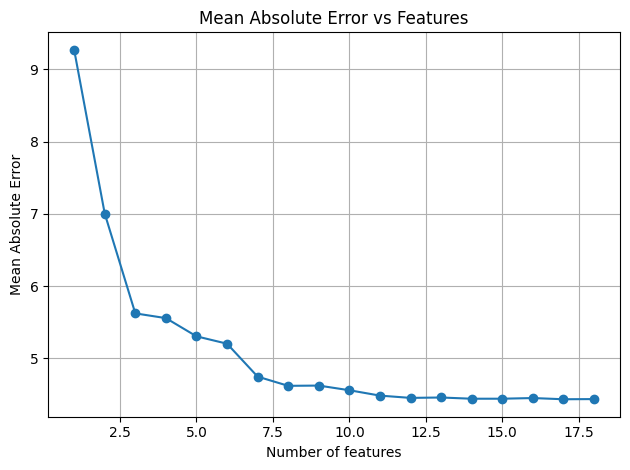

In [45]:
import matplotlib.pyplot as plt
# plot the graph for mae values vs number of features
plt.plot(range(1, size), mae_vals, marker='o', linestyle='-')
plt.xlabel('Number of features')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error vs Features')
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Define parameter search space
params = {
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 2, 3, 4, 5],
    'max_depth': [5, 6, 7, 8, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# Initialize XGBoost regressor model with MAE objective
xgb_model = XGBRegressor(objective='reg:squarederror')  

# Define the RandomizedSearchCV object with MAE scoring metric
random_search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=100, cv=5, scoring='neg_mean_absolute_error', random_state=42)

# Fit the model with hyperparameter tuning
random_search.fit(X_train[features[0:min_mean_absolute_error]], y_train)

# Access the best hyperparameters
xgb_best_params = random_search.best_params_

# Print the best parameters
print("Best Hyperparameters:", xgb_best_params)

# Get the best model
xgb_best_model = random_search.best_estimator_

# Use the best_model for prediction
xgb_y_pred = xgb_best_model.predict(X_test[features[0:min_mean_absolute_error]])

# Calculate RMSE
xgb_rmse = mean_squared_error(y_test, xgb_y_pred, squared=False)

# Print RMSE
print("Root Mean Squared Error:", xgb_rmse)



Best Hyperparameters: {'subsample': 0.7, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
Root Mean Squared Error: 5.636806247736755


In [50]:
results['XGBRegressor']={'RMSE': xgb_rmse}
results_df = pd.DataFrame(results)
print(results_df)

      Linear Regression  Random Forest  Gradient Boosting  \
RMSE           9.212576       5.678763           6.894402   

      Support Vector Regression  ElasticNet Regression  \
RMSE                  14.417126              10.904818   

      k-Nearest Neighbors Regression  Decision Tree Regression  \
RMSE                       14.591546                  7.765763   

      <class 'xgboost.sklearn.XGBRegressor'>  XGBRegressor  
RMSE                                5.636806      5.636806  


In [51]:
# Select best model based on RMSE
best_model = min(results, key=lambda x: results[x]['RMSE'])
print(f"\nBest model: {best_model}")

if best_model == 'XGBRegressor':
    best_model = xgb_best_model
    
else:
    best_model = models[best_model]


Best model: <class 'xgboost.sklearn.XGBRegressor'>


KeyError: <class 'xgboost.sklearn.XGBRegressor'>

In [54]:
best_model = xgb_best_model

In [55]:
# Train the best model on the entire training data

best_model.fit(X, y)

# Predict habitability score using the best model
predicted_scores = best_model.predict(test_df.drop(columns=['Id']))

# Create dataframe with ID and predicted habitability score
output_df = pd.DataFrame({'Id': test_df['Id'], 'Habitability_Score': predicted_scores})

In [56]:
output_df

,Id,Habitability_Score
0,0x6808,78.652931
1,0x6a98,73.717552
2,0xacc0,76.595108
3,0x8225,81.785240
4,0xaee8,74.090729
...,...,...
7895,0x6e26,75.285690
7896,0xa013,79.123383
7897,0x9721,77.126862
7898,0x7e25,71.316757


In [58]:
# Save the submission dataframe to a CSV file
output_df.to_csv('submission1.csv', index=False)